<a href="https://colab.research.google.com/github/hgabrali/Machine-Learning/blob/main/Isolation_Forest_End_to_End_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌲 Isolation Forest: Practical Anomaly Detection

We're going to explore **Isolation Forest**, a popular algorithm specifically designed for detecting **anomalies (outliers)**. We will implement this using the **Breast Cancer Dataset**, which contains 30 features describing the characteristics of cell nuclei from biopsies.

This lesson will guide you through both the theory and the practical steps to implement Isolation Forest in Python.

---

## Reminder: Key Parameters of the Isolation Forest Algorithm

The performance of the algorithm is heavily dependent on these hyperparameters:

* **`n_estimators`**: Number of trees in the forest.
* **`max_samples`**: Number of data points used to train each tree.
* **`contamination`**: The proportion of outliers expected in the data (e.g., 0.01 for 1%).
* **`max_features`**: Number of features considered for each random split.

*(We will discuss the approach to set and tune these values later in the lesson. For now, just keep in mind that these parameters directly affect how the algorithm works.)*

---

## Step-by-Step Isolation Forest Implementation with the Breast Cancer Dataset

### 1. Importing Libraries and Dataset

First, we load the necessary libraries and the Breast Cancer dataset, which contains 569 samples and 30 numeric features.

**👉 Action:** Insert a new **Code Cell** below and import the required libraries and the dataset.

In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Check the shape of the data
print(X.shape)  # Output: (569, 30)

(569, 30)


### 2. Initializing and Training the Isolation Forest Model



Next, we initialize the Isolation Forest model and fit it to the dataset. The core of this step involves setting the crucial hyperparameters.

### Parameter Selection Rationale:

* **`n_estimators = 100`**: We'll use 100 trees as a robust starting point. A larger number of trees generally leads to more stable results.
* **`contamination = 0.1`**: We set the contamination rate to 0.1 (i.e., we expect **10%** of the data points to be outliers). This parameter is a rough **estimate** of the proportion of anomalies in the dataset, and it significantly impacts how many points are ultimately flagged. *(Note: To get a better idea of the true contamination rate, a more detailed exploratory data analysis (EDA) should be conducted.)*

### 🐍 Action: Fit the Model

**👉 Action:** Insert a new **Code Cell** below and train the Isolation Forest model on the loaded data.

In [2]:
# Initialize Isolation Forest with 100 trees and contamination set to 0.1
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model to the dataset
iso_forest.fit(X)

IsolationForest(contamination=0.1, random_state=42)

### 3. Predicting Anomalie

* After training the model, we can predict which data points are anomalies. The algorithm labels anomalies as -1 and normal points as 1.

In [3]:
# Get anomaly predictions
predictions = iso_forest.predict(X)

# Extract anomalies and normal points
anomalies = X[predictions == -1]
normal_points = X[predictions == 1]

#### 3.a. Generate Predictions and Separate Anomalies

The final step is to use the trained Isolation Forest model to generate predictions for our data points and separate the identified anomalies from the normal data.

#### The `predict(X)` Method

* The **`predict(X)`** method generates predictions for each data point, labeling it as either:
    * **`1`** (This data point is considered **normal**).
    * **`-1`** (This data point is flagged as an **anomaly** or outlier).

#### Separation

We separate the anomalies and normal points into two different arrays (`anomalies` and `normal_points`) based on this prediction label for further analysis and visualization.

**👉 Action:** Insert a new **Code Cell** below to execute the prediction and separation steps.

### 4. Visualizing Results

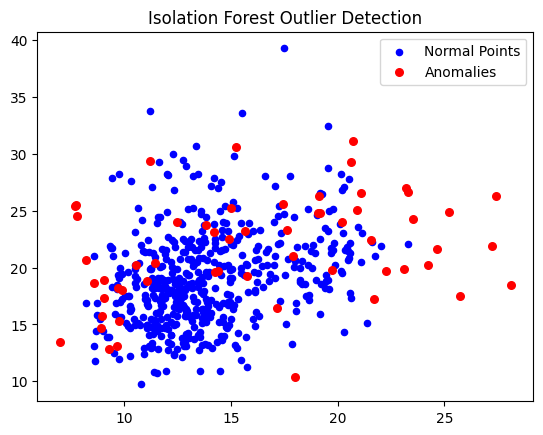

In [4]:
# Plot anomalies vs normal points using the first two features
plt.scatter(normal_points[:, 0], normal_points[:, 1], label="Normal Points", c='blue', s=20)
plt.scatter(anomalies[:, 0], anomalies[:, 1], label="Anomalies", c='red', s=30)
plt.title("Isolation Forest Outlier Detection")
plt.legend()
plt.show()

###5. Model Evaluation and F1 Score

Evaluating the performance of an **Anomaly Detection** model requires careful consideration, as the task is essentially a **classification problem** (outlier vs. not outlier) with highly **imbalanced classes**.

### Why Not Use Accuracy?

Standard **Accuracy** is misleading for imbalanced datasets (like anomaly detection) because the model can achieve high accuracy (e.g., 99%) simply by classifying every single point as "normal." The **F1 Score** is a more robust metric as it balances **Precision** (model flags correctly) and **Recall** (model catches all real anomalies).

### The Challenge of True Labels

The Breast Cancer dataset, in its standard form, doesn't provide labels that clearly identify which points are "anomalies" and which are "normal."

**To calculate validation metrics (like F1 Score) for demonstration, we must simulate the "True Label Array" indicating known anomalies.**

### 🐍 The Trick: Simulating True Anomalies

For demonstration purposes in this exercise, we will randomly simulate a few anomalies to create a **True Label Array**.

**👉 Action:** Insert a new **Code Cell** below to execute the creation of the simulated true labels.

In [5]:
import numpy as np

# Simulate true labels: 0 for normal, 1 for anomalies
true_labels = np.zeros(len(X))
# Randomly assign 10% of the samples as anomalies (1s)
anomaly_indices = np.random.choice(len(X), size=int(len(X) * 0.1), replace=False)
true_labels[anomaly_indices] = 1

In [6]:
from sklearn.metrics import f1_score

# Adjust predictions for comparison with true labels
adjusted_predictions = np.where(predictions == -1, 1, 0)

# Calculate the F1 score
f1 = f1_score(true_labels, adjusted_predictions)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.0885


## 6. Improving the Model By Playing Around With The Parameters

Fine-tuning an **Isolation Forest** model can significantly improve its performance, especially when it comes to finding outliers that matter for your specific use case. Let’s break down the key parameters you can tune:

---

### 1. `n_estimators` (Number of Trees)

* **What it does:** This controls the number of decision trees used in the **ensemble**. More trees generally result in better performance because more trees can average out random variations in the data.
* **Why it's important:** Increasing this value can improve accuracy but will also increase computational time.
* **Tip:** If you're dealing with a large dataset, start with a moderate number (e.g., **100**) and increase gradually to balance performance and speed.

**Example Change:**

For instance, we could've tried training our Isolation Forest with the `n_estimators` equal to **200**. Not surprisingly, we need to make just a single change in the initialization step:

```python
# Single change required:
isolation_forest = IsolationForest(n_estimators=200, contamination=0.1, random_state=42)

In [7]:
# Try increasing the number of estimators for potentially better performance
iso_forest = IsolationForest(n_estimators=200, contamination=0.1, random_state=42)
iso_forest.fit(X)

IsolationForest(contamination=0.1, n_estimators=200, random_state=42)

### 2. `contamination` (Proportion of Outliers)

* **What it does:** This critical parameter defines the expected **proportion of outliers** in the dataset. It is used to calculate the decision **threshold** for labeling points as anomalies.
* **Why it's important:** Setting the `contamination` value accurately is crucial:
    * Setting it **too high** can result in too many **False Positives** (flagging normal points as anomalous).
    * Setting it **too low** may **overlook real outliers** (False Negatives).
* **Tip:** If you're unsure about the true contamination rate, a good starting point is often a small value, such as **0.1 (10%) or 0.05 (5%)**, then you should adjust it based on your domain knowledge and data exploration.

**Code Example for Setting Contamination:**

Here is how we set the `contamination` parameter in the model initialization:

```python
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

In [8]:
# Adjust the contamination rate if you expect a different proportion of outliers
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X)

IsolationForest(contamination=0.05, random_state=42)

### 3. `max_samples` (Number of Samples Per Tree)

* **What it does:** This controls the number of data points used to train each individual tree in the forest. It dictates the size of the random subset drawn for each tree.
* **Why it's important:**
    * By default, it's set to the total number of samples in the dataset (`'auto'` or `n_samples`).
    * **Reducing `max_samples`** can significantly **speed up the training process**.
    * Setting it too low might reduce the model's overall performance and stability.
    * **Tip:** For smaller datasets, you can safely leave it as the default. Use a smaller absolute value (e.g., **256 or 512**) for very large datasets to improve training time efficiency.

**Code Example for Setting max\_samples:**

In code, setting up the `max_samples` value looks like this:

```python
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, max_samples=256, random_state=42)

In [9]:
# Try limiting the number of features used for each split
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, max_features=10, random_state=42)
iso_forest.fit(X)

IsolationForest(contamination=0.1, max_features=10, random_state=42)

* Changing values for the parameters we’ve just described can significantly impact the way the model works, increasing our F1 score!

# **Conclusion**

## Fine-Tuning Philosophy: Balancing Performance and Efficiency

Fine-tuning Isolation Forest involves balancing **accuracy** (finding the right anomalies) with **computational efficiency** (how fast the model trains).

* **Primary Focus:** **`n_estimators`** (number of trees) and **`contamination`** (expected proportion of anomalies) are typically the most important parameters to tune as they directly influence the model's robustness and the final decision threshold.
* **Efficiency:** Adjusting **`max_samples`** and **`max_features`** can lead to significant improvements in training speed, especially on very large and high-dimensional datasets.
* **Key Takeaway:** Experimenting with different parameter settings and evaluating the model's performance on your specific data is the key to finding the right balance for your use case.

---

**👉 Next Step:** The next lesson is dedicated to practice where you’ll implement your own Isolation Forest to find outliers on a new dataset.